In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

decode_newswire = ' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]])


557056/550378 [==============================] - 1s 2us/step


In [10]:
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
import numpy as np


def vectorize_sequences(sequences, dimention=10000 ):
    results = np.zeros((len(sequences),dimention))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [16]:
#label trans to one_hot
# def to_one_hot(sequences,dimention=46):
#     print(len(sequences))
#     results = np.zeros((len(sequences),dimention))
#     for i, sequence in enumerate(sequences):
#         results[i,sequence] = 1.
#         return results
    
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels) 




#keras 内置方法
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
#构建网络
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


In [24]:
#编译模型
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

In [26]:
#training
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 312us/step - loss: 2.5241 - acc: 0.4976 - val_loss: 1.7181 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.4439 - acc: 0.6888 - val_loss: 1.3488 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.0972 - acc: 0.7648 - val_loss: 1.1734 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.8712 - acc: 0.8166 - val_loss: 1.0817 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.7046 - acc: 0.8492 - val_loss: 0.9861 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.5673 - acc: 0.8800 - val_loss: 0.9414 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4592 - acc: 0.9048 - val_loss: 0.9072 - val_acc: 0.8040


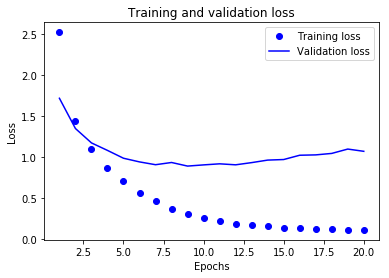

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()